<a href="https://colab.research.google.com/github/chiruconew/EXTRA/blob/main/ProyFinal_NDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [63]:
url = 'https://raw.githubusercontent.com/chiruconew/EXTRA/main/data_set_dg.csv'
df  = pd.read_csv(url)

In [64]:
df.head()

,TELEFONO,CUOTA_BASICA,TIPO_PRODUCTO,CAPACIDAD_PLAN_DATOS,NIT,ANEXOS_HOME,ANEXOS_MOBILE,MESES_CLIENTE_ANTIGUEDAD,MESES_CONTRATO,DEPARTAMENTO_GUATEMALA,INICIO_DE_CONTRATO,SUBSIDIO,PAGO_DEVICE_CLIENTE,PROMEDIO_CONSUMO_DATOS_GB,CONSUMO_PORCENT_CUOTA,FACTURAS_PAGADAS_EN_TIEMPO,FACTURAS_PAGADAS_TARDE,CANTIDAD_ABONOS_PARA_PAGAR_AVG,AVG_DIAS_PAGO_A_TIEMPO,AVG_DIAS_PAGO_TARDE,DOWNSELL
0,52017983,198.9904,C,5,153912-4,0.0,1.0,246.0,18.0,GUATEMALA,06-OCT-16 00:00:00,NaN,NaN,1.0,0.18,0.0,10.0,1.0,0.0,-4.0,NO
1,55287011,499.0048,C,20,4930230-2,3.0,2.0,200.0,24.0,ESCUINTLA,07-JAN-19 00:00:00,3042.17,1607.14,10.0,0.51,8.0,2.0,1.0,2.0,-1.0,NO
2,53187495,298.9952,C,15,1199130-5,0.0,3.0,98.0,24.0,GUATEMALA,03-JAN-20 00:00:00,1237.57,207.36,5.0,0.33,10.0,0.0,1.0,8.0,0.0,NO
3,57813259,224.9968,Q,14,87103923,0.0,1.0,39.0,0.0,SOLOLA,21-AUG-20 00:00:00,NaN,NaN,18.0,1.29,4.0,4.0,1.0,17.0,-18.0,NO
4,40152016,298.9952,C,15,1526520-K,0.0,1.0,16.0,24.0,SAN MARCOS,15-NOV-19 00:00:00,1441.82,0.90,8.0,0.50,6.0,4.0,2.0,18.0,-5.0,NO


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18032 entries, 0 to 18031
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TELEFONO                        18032 non-null  int64  
 1   CUOTA_BASICA                    18032 non-null  float64
 2   TIPO_PRODUCTO                   18032 non-null  object 
 3   CAPACIDAD_PLAN_DATOS            18032 non-null  int64  
 4   NIT                             18032 non-null  object 
 5   ANEXOS_HOME                     13008 non-null  float64
 6   ANEXOS_MOBILE                   13008 non-null  float64
 7   MESES_CLIENTE_ANTIGUEDAD        17468 non-null  float64
 8   MESES_CONTRATO                  17468 non-null  float64
 9   DEPARTAMENTO_GUATEMALA          17468 non-null  object 
 10  INICIO_DE_CONTRATO              17468 non-null  object 
 11  SUBSIDIO                        13852 non-null  float64
 12  PAGO_DEVICE_CLIENTE             

In [66]:
df_recortado = df.dropna()
df.describe()

,TELEFONO,CUOTA_BASICA,CAPACIDAD_PLAN_DATOS,ANEXOS_HOME,ANEXOS_MOBILE,MESES_CLIENTE_ANTIGUEDAD,MESES_CONTRATO,SUBSIDIO,PAGO_DEVICE_CLIENTE,PROMEDIO_CONSUMO_DATOS_GB,CONSUMO_PORCENT_CUOTA,FACTURAS_PAGADAS_EN_TIEMPO,FACTURAS_PAGADAS_TARDE,CANTIDAD_ABONOS_PARA_PAGAR_AVG,AVG_DIAS_PAGO_A_TIEMPO,AVG_DIAS_PAGO_TARDE
count,1.803200e+04,18032.000000,18032.000000,13008.000000,13008.000000,17468.000000,17468.000000,13852.000000,13852.000000,18018.000000,18018.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000
mean,4.491745e+07,422.137482,21.228316,0.889991,2.921433,103.231566,20.962388,2385.438579,861.957593,14.165945,0.741790,6.015266,3.521095,1.231709,10.405962,-4.288886
std,9.770804e+06,204.524743,13.420378,6.191528,44.163148,99.224766,16.044787,1890.432598,1586.405795,10.030552,0.489248,4.018864,3.599561,0.443364,8.959677,8.087522
min,3.000014e+07,0.996800,0.000000,0.000000,1.000000,2.000000,-1387.000000,-8879.250000,-8212.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-194.000000
25%,3.340242e+07,298.995200,15.000000,0.000000,1.000000,32.000000,18.000000,1370.910000,0.890000,7.000000,0.390000,3.000000,0.000000,1.000000,3.000000,-5.000000
50%,4.692375e+07,298.995200,15.000000,0.000000,1.000000,88.000000,24.000000,1496.825000,133.040000,13.000000,0.710000,7.000000,2.000000,1.000000,9.000000,-2.000000
75%,5.208784e+07,499.004800,25.000000,0.000000,2.000000,139.000000,24.000000,3205.347500,1125.000000,18.000000,1.000000,9.000000,7.000000,1.000000,17.000000,0.000000
max,5.999998e+07,1498.000000,70.000000,386.000000,3234.000000,1475.000000,24.000000,13266.570000,9496.860000,104.000000,12.670000,70.000000,56.000000,9.000000,220.000000,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efc7809fad0>,
      dtype=object)

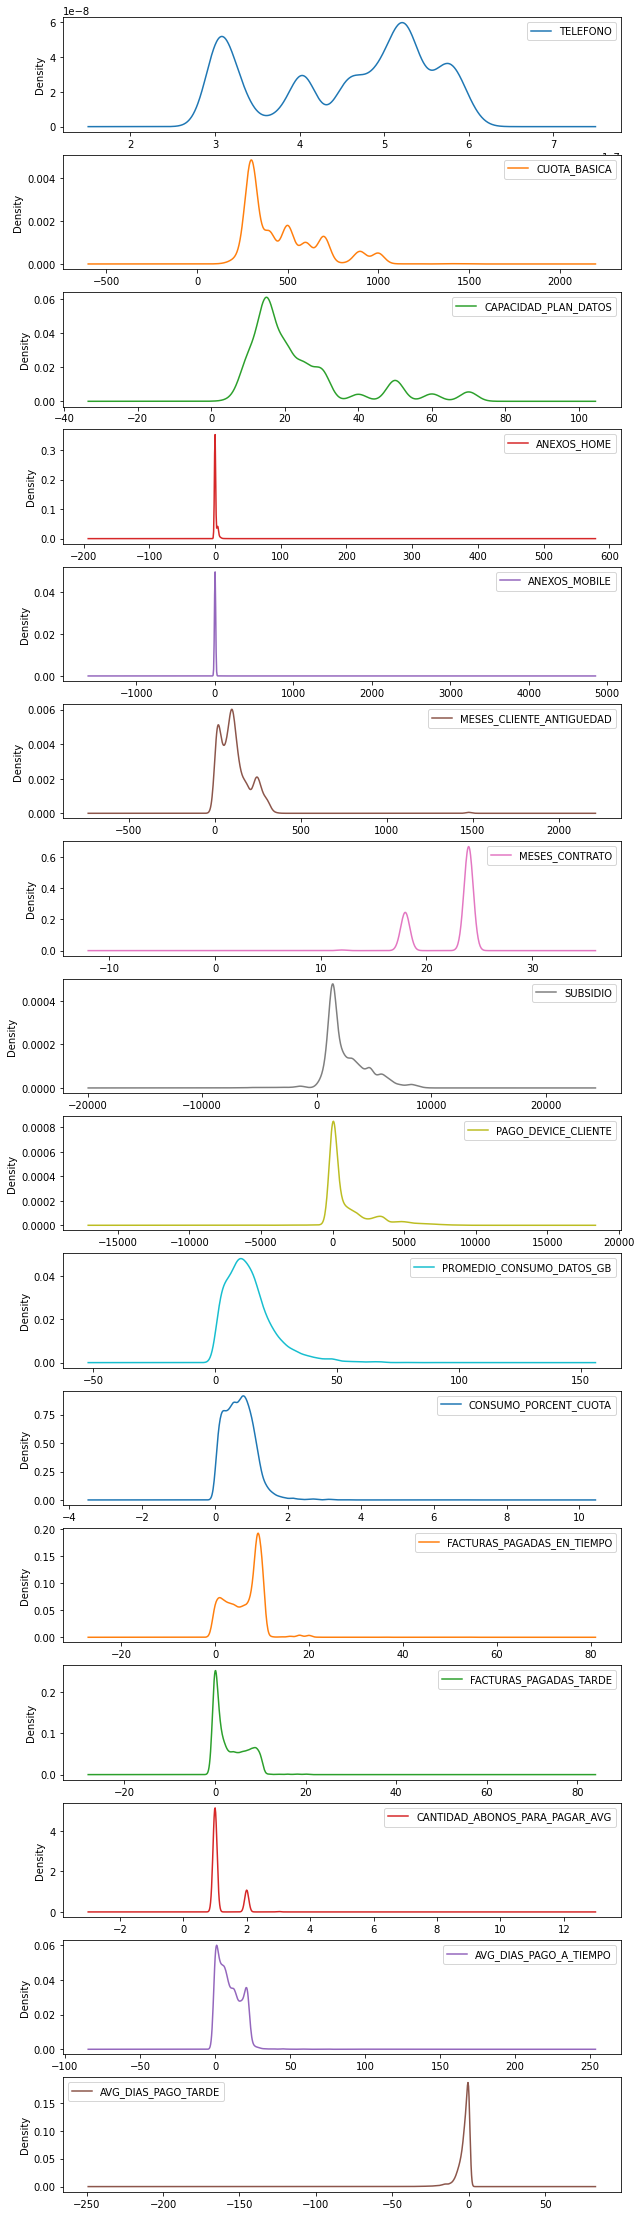

In [67]:
df_recortado.plot.kde(subplots=True, figsize=(10,40), sharex=False)

In [71]:
df_recortado = df_recortado[df_recortado['CAPACIDAD_PLAN_DATOS'] > 0]
df_recortado = df_recortado[df_recortado['CUOTA_BASICA'] > 0]
df_recortado = df_recortado[df_recortado['ANEXOS_HOME'] < 10]
df_recortado = df_recortado[df_recortado['ANEXOS_MOBILE'] < 10]
df_recortado = df_recortado[df_recortado['MESES_CLIENTE_ANTIGUEDAD'] < 500]
df_recortado = df_recortado[df_recortado['MESES_CONTRATO'] > 0]

In [72]:
df_recortado.describe()

,TELEFONO,CUOTA_BASICA,CAPACIDAD_PLAN_DATOS,ANEXOS_HOME,ANEXOS_MOBILE,MESES_CLIENTE_ANTIGUEDAD,MESES_CONTRATO,SUBSIDIO,PAGO_DEVICE_CLIENTE,PROMEDIO_CONSUMO_DATOS_GB,CONSUMO_PORCENT_CUOTA,FACTURAS_PAGADAS_EN_TIEMPO,FACTURAS_PAGADAS_TARDE,CANTIDAD_ABONOS_PARA_PAGAR_AVG,AVG_DIAS_PAGO_A_TIEMPO,AVG_DIAS_PAGO_TARDE
count,1.003400e+04,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000,10034.000000
mean,4.550886e+07,472.130307,23.681981,0.733805,1.781144,113.583516,22.346621,2569.912373,977.165923,14.380307,0.677070,6.362169,3.457445,1.181084,9.904226,-3.286725
std,9.774200e+06,212.772211,14.695691,1.698845,1.193164,82.165060,2.739176,1987.766753,1675.034226,10.359032,0.423876,3.896113,3.687352,0.403806,8.294063,6.156859
min,3.000018e+07,98.996800,1.000000,0.000000,1.000000,2.000000,12.000000,-8879.250000,-8212.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-166.000000
25%,3.715191e+07,298.995200,15.000000,0.000000,1.000000,48.000000,18.000000,1385.720000,0.890000,7.000000,0.360000,3.000000,0.000000,1.000000,3.000000,-4.000000
50%,4.846505e+07,399.000000,20.000000,0.000000,1.000000,100.000000,24.000000,1890.045000,133.040000,12.000000,0.660000,7.000000,2.000000,1.000000,8.000000,-2.000000
75%,5.308454e+07,598.998400,30.000000,0.000000,2.000000,160.750000,24.000000,3601.740000,1350.000000,19.000000,0.930000,9.000000,7.000000,1.000000,16.000000,0.000000
max,5.999998e+07,1498.000000,70.000000,9.000000,9.000000,369.000000,24.000000,13266.570000,9496.860000,104.000000,6.960000,54.000000,56.000000,9.000000,169.000000,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efc778ecad0>,
      dtype=object)

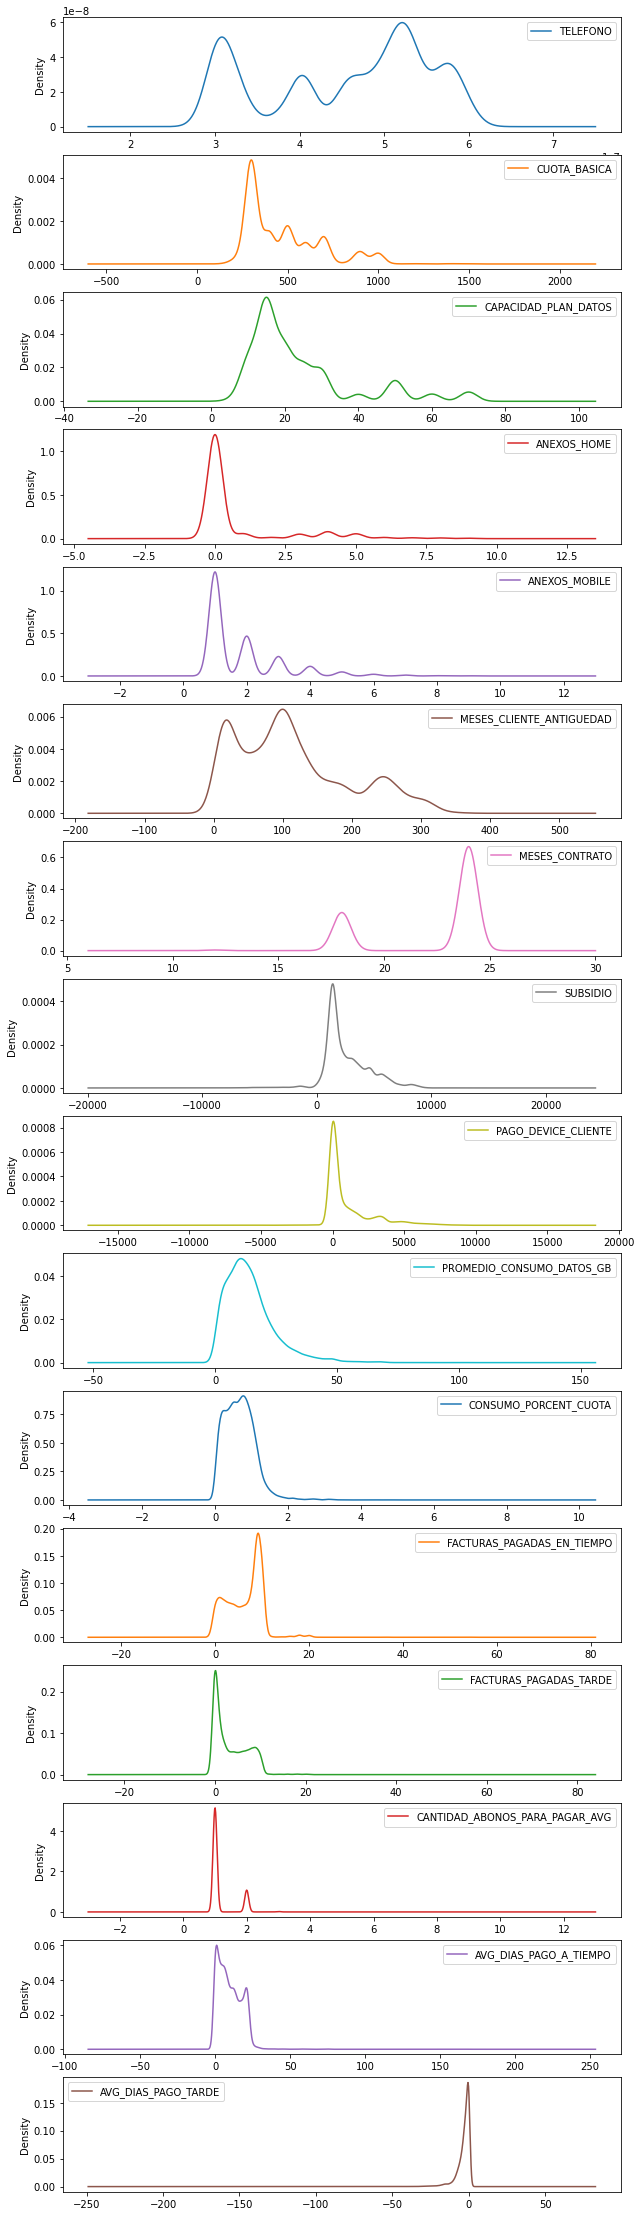

In [73]:
df_recortado.plot.kde(subplots=True, figsize=(10,40), sharex=False)

,TELEFONO,CUOTA_BASICA,TIPO_PRODUCTO,CAPACIDAD_PLAN_DATOS,NIT,ANEXOS_HOME,ANEXOS_MOBILE,MESES_CLIENTE_ANTIGUEDAD,MESES_CONTRATO,DEPARTAMENTO_GUATEMALA,INICIO_DE_CONTRATO,SUBSIDIO,PAGO_DEVICE_CLIENTE,PROMEDIO_CONSUMO_DATOS_GB,CONSUMO_PORCENT_CUOTA,FACTURAS_PAGADAS_EN_TIEMPO,FACTURAS_PAGADAS_TARDE,CANTIDAD_ABONOS_PARA_PAGAR_AVG,AVG_DIAS_PAGO_A_TIEMPO,AVG_DIAS_PAGO_TARDE,DOWNSELL
6,30501650,298.9952,A,15,2991792-1,1.0,1.0,68.0,18.0,GUATEMALA,02-DEC-20 00:00:00,-299.27,-401.79,11.0,0.73,9.0,0.0,1.0,22.0,0.0,NO
75,55220540,349.9888,C,20,2480575-0,8.0,1.0,184.0,18.0,GUATEMALA,06-AUG-20 00:00:00,-2384.51,-3214.29,15.0,0.73,3.0,7.0,1.0,1.0,-2.0,NO
102,33994578,298.9952,C,15,6335553-1,0.0,1.0,17.0,18.0,BAJA VERAPAZ,18-OCT-19 00:00:00,-1457.42,-0.90,11.0,0.76,9.0,0.0,1.0,11.0,0.0,NO
269,32771237,298.9952,C,10,10488339-1,0.0,1.0,20.0,24.0,GUATEMALA,07-JUL-19 00:00:00,-3038.73,-3125.00,21.0,2.14,2.0,8.0,2.0,22.0,-7.0,NO
395,53164611,298.9952,C,15,6258870-2,0.0,1.0,176.0,18.0,EL PROGRESO,25-MAY-20 00:00:00,-1384.23,-0.89,18.0,1.19,6.0,3.0,2.0,17.0,-10.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16937,52000070,598.9984,C,30,580851-0,7.0,4.0,234.0,18.0,GUATEMALA,30-AUG-19 00:00:00,-4067.26,-1607.14,11.0,0.37,6.0,4.0,1.0,6.0,-2.0,NO
17047,52051432,399.0000,C,15,596033-9,0.0,1.0,301.0,24.0,SACATEPEQUEZ,28-MAR-19 00:00:00,-2893.70,-179.24,6.0,0.41,10.0,0.0,1.0,8.0,0.0,NO
17153,58921910,298.9952,C,15,717060-2,0.0,1.0,121.0,18.0,GUATEMALA,11-MAY-20 00:00:00,-1436.17,-0.89,11.0,0.73,0.0,9.0,1.0,0.0,-4.0,NO
17168,49133705,998.9952,C,70,8883645-2,6.0,1.0,22.0,18.0,SANTA ROSA,25-SEP-20 00:00:00,-5455.00,-2142.76,3.0,0.05,8.0,1.0,1.0,20.0,-2.0,NO


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efc787260d0>,
      dtype=object)

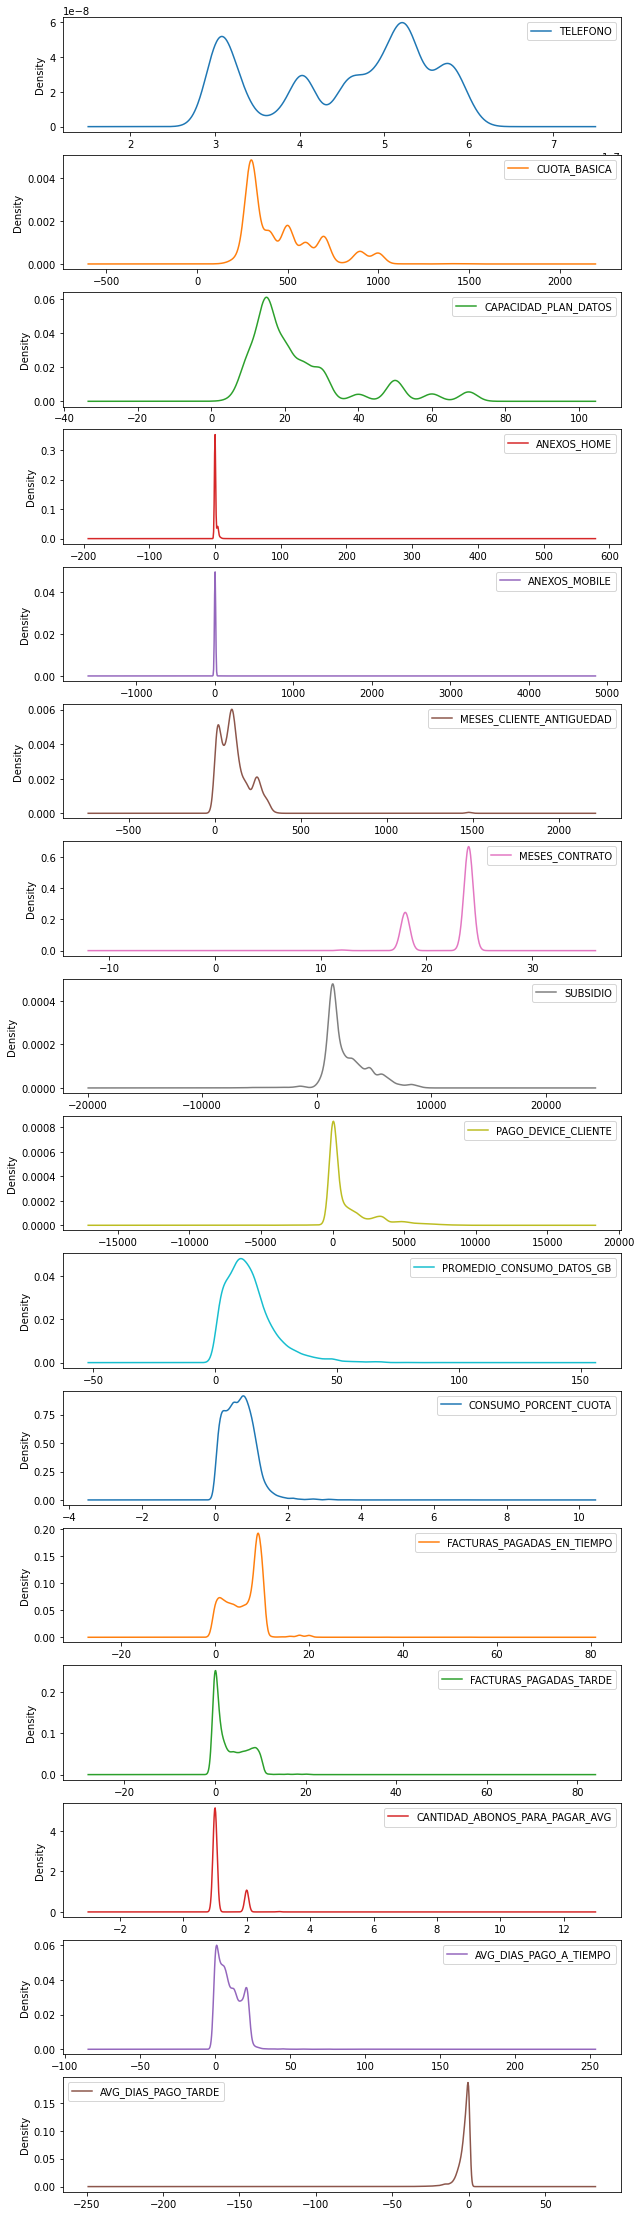

In [57]:
df_recortado.plot.kde(subplots=True, figsize=(10,40), sharex=False)

In [75]:
df_recortado['DEPARTAMENTO_GUATEMALA'].value_counts()

GUATEMALA           6567
ESCUINTLA            382
SACATEPEQUEZ         353
HUEHUETENANGO        346
ALTA VERAPAZ         273
QUETZALTENANGO       247
SAN MARCOS           215
JUTIAPA              153
QUICHE               147
CHIMALTENANGO        145
SANTA ROSA           143
CHIQUIMULA           142
PETEN                129
IZABAL               126
ZACAPA               103
RETALHULEU            99
SUCHITEPEQUEZ         89
SOLOLA                81
JALAPA                78
BAJA VERAPAZ          73
EL PROGRESO           53
TOTONICAPAN           47
NOT APPLICABLE        30
TO BE DETERMINED      13
Name: DEPARTAMENTO_GUATEMALA, dtype: int64

In [79]:
!pip install category_encoders

In [80]:
from category_encoders import CountEncoder

In [96]:
df_recortado['MESES_CONTRATO'].unique()

array([24., 18., 12.])

In [97]:
df_recortado.loc[df_recortado['MESES_CONTRATO'] == 12, 'MESES_CONT_NAME'] = 'DOCE'
df_recortado.loc[df_recortado['MESES_CONTRATO'] == 24, 'MESES_CONT_NAME'] = 'VEINTICUATRO'
df_recortado.loc[df_recortado['MESES_CONTRATO'] == 18, 'MESES_CONT_NAME'] = 'DIECIOCHO'

In [98]:
count_enc_meses = CountEncoder(normalize=True)

In [99]:
count_enc_meses.fit_transform(df_recortado['MESES_CONT_NAME'])

,MESES_CONT_NAME
1,0.728822
2,0.728822
4,0.728822
5,0.266793
6,0.266793
...,...
17462,0.728822
17463,0.728822
17464,0.728822
17465,0.728822


In [100]:
count_enc_meses.mapping

{'MESES_CONT_NAME': VEINTICUATRO    0.728822
 DIECIOCHO       0.266793
 DOCE            0.004385
 Name: MESES_CONT_NAME, dtype: float64}

In [101]:
count_enc_depto = CountEncoder(normalize=True, combine_min_nan_groups=True, min_group_size=30,min_group_name='OTROS')

In [102]:
count_enc_depto.fit_transform(df_recortado['DEPARTAMENTO_GUATEMALA'])

,DEPARTAMENTO_GUATEMALA
1,0.038071
2,0.654475
4,0.021427
5,0.654475
6,0.654475
...,...
17462,0.014152
17463,0.654475
17464,0.014152
17465,0.654475


In [103]:
count_enc_depto.mapping

{'DEPARTAMENTO_GUATEMALA': GUATEMALA           0.654475
 ESCUINTLA           0.038071
 SACATEPEQUEZ        0.035180
 HUEHUETENANGO       0.034483
 ALTA VERAPAZ        0.027207
 QUETZALTENANGO      0.024616
 SAN MARCOS          0.021427
 JUTIAPA             0.015248
 QUICHE              0.014650
 CHIMALTENANGO       0.014451
 SANTA ROSA          0.014252
 CHIQUIMULA          0.014152
 PETEN               0.012856
 IZABAL              0.012557
 ZACAPA              0.010265
 RETALHULEU          0.009866
 SUCHITEPEQUEZ       0.008870
 SOLOLA              0.008073
 JALAPA              0.007774
 BAJA VERAPAZ        0.007275
 EL PROGRESO         0.005282
 TOTONICAPAN         0.004684
 NOT APPLICABLE      0.002990
 TO BE DETERMINED    0.001296
 Name: DEPARTAMENTO_GUATEMALA, dtype: float64}